In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("INVideos.csv")

In [4]:
df

video_id trending_date  \
0      kzwfHumJyYc      17.14.11   
1      zUZ1z7FwLc8      17.14.11   
2      10L1hZ9qa58      17.14.11   
3      N1vE8iiEg64      17.14.11   
4      kJzGH0PVQHQ      17.14.11   
...            ...           ...   
37347  iNHecA3PJCo      18.14.06   
37348  dpPmPbhcslM      18.14.06   
37349  mV6aztP58f8      18.14.06   
37350  qxqDNP1bDEw      18.14.06   
37351  wERgpPK44w0      18.14.06   

                                                   title       channel_title  \
0      Sharry Mann: Cute Munda ( Song Teaser) | Parmi...     Lokdhun Punjabi   
1      पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...             HJ NEWS   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...                TFPC   
3                         Eruma Saani | Tamil vs English         Eruma Saani   
4      why Samantha became EMOTIONAL @ Samantha naga ...          Filmylooks   
...                                                  ...                 ...   
37347  फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...      RDC Rajasthani   
37348                         Seetha | Flowers | Ep# 364          Flowers TV   
37349  Bhramanam I Episode 87 - 12 June 2018 I Mazhav...   Mazhavil Manorama   
37350  Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...           Tarang TV   
37351  Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...  Suresh Productions   

       category_id              publish_time  \
0                1  2017-11-12T12:20:39.000Z   
1               25  2017-11-13T05:43:56.000Z   
2               24  2017-11-12T15:48:08.000Z   
3               23  2017-11-12T07:08:48.000Z   
4               24  2017-11-13T01:14:16.000Z   
...            ...                       ...   
37347           23  2018-06-13T08:01:11.000Z   
37348           24  2018-06-13T11:30:04.000Z   
37349           24  2018-06-13T05:00:02.000Z   
37350           24  2018-06-13T15:07:49.000Z   
37351           24  2018-06-10T04:29:54.000Z   

                                                    tags    views  likes  \
0      sharry mann|"sharry mann new song"|"sharry man...  1096327  33966   
1      पीरियड्स के समय|"पेट पर पति करता ऐसा"|"देखकर द...   590101    735   
2      Stylish Star Allu Arjun @ ChaySam Wedding Rece...   473988   2011   
3      Eruma Saani|"Tamil Comedy Videos"|"Films"|"Mov...  1242680  70353   
4      Filmylooks|"latest news"|"telugu movies"|"telu...   464015    492   
...                                                  ...      ...    ...   
37347  twinkle vaishnav comedy|"twinkle vaishnav"|"tw...   214378   3291   
37348  flowers serials|"actress"|"malayalam serials"|...   406828   1726   
37349  mazhavil manorama|"bhramanam full episode"|"gt...   386319   1216   
37350  tarang|"tarang tv"|"tarang tv online"|"tarang ...   130263    698   
37351  Ee Nagaraniki Emaindi|"Ee Nagaraniki Emaindi T...  1278249  22466   

       dislikes  comment_count  \
0           798            882   
1           904              0   
2           243            149   
3          1624           2684   
4           293             66   
...         ...            ...   
37347       404            196   
37348       478           1428   
37349       453            697   
37350       115             65   
37351      1609           1205   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg              False   
1      https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg               True   
2      https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg              False   
3      https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg              False   
4      https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg              False   
...                                               ...                ...   
37347  https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg              False   
37348  https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg              False   
37349  https://i.ytimg.com/vi/mV6

In [5]:
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


In [6]:
df.columns[df.isna().any()] #missing values

Index(['description'], dtype='object')

In [7]:
df.fillna(" ",inplace=True) #replacing them with empty strings

In [8]:
print("Number of duplicate rows ",list(df.duplicated()).count(True)) #duplicate

Number of duplicate rows  4263


In [9]:
df=df.drop_duplicates() #remove
print(df.shape)

(33089, 16)


In [10]:
print("Mean of views:",df['views'].mean())

Mean of views: 996342.5065731814


In [11]:
most_viewed=(df[df['views']==df['views'].max()])
print("Most viewed video:")
for i in ['title','views']:
  print("{} : {}".format(i,most_viewed[i].values[0]))

Most viewed video:
title : YouTube Rewind: The Shape of 2017 | #YouTubeRewind
views : 125432237


In [12]:
def text_preprocess(data):
    data=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+',"", data)
    data=re.sub(r'\\n+'," ",data)
    data=data.replace("|"," ")
    data=re.sub(r'[?|!|\'|"|#|,|-|@|(|)]', "", data)
    data=data.replace(": "," ").replace("-"," ").replace(" :"," ")
    data=re.sub(r' +',' ',data).lower()
    return data


In [13]:
df_1=df.copy()
df["Text_Feature"]=df.title+" "+df_1.tags+" "
for i in range(3):
   df["Text_Feature"]=df["Text_Feature"]+" "+df.description+" "+df.channel_title+" "

<ipython-input-13-8114c47a61a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text_Feature"]=df.title+" "+df_1.tags+" "
<ipython-input-13-8114c47a61a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Text_Feature"]=df["Text_Feature"]+" "+df.description+" "+df.channel_title+" "


In [14]:
from gensim.models import Word2Vec
data=df['Text_Feature']
list_of_sent=[]
for sent in data.values:
    list_of_sent.append(sent.split())

/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [15]:
w2v_model=Word2Vec(list_of_sent,min_count=5, workers=4)
words = list(w2v_model.wv.key_to_index.keys())

In [16]:
!pip install tqdm


In [ ]:
#from tqdm import tqdm
def avgw2v(list_of_sent):
    sent_vectors = [] 
    for sent in list_of_sent:
        sent_vec = np.zeros(100)
        cnt_words =0 
        for word in sent:
            if word in words:
                vec = w2v_model.wv[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        sent_vectors.append(sent_vec)
    print(len(sent_vectors))
    print(len(sent_vectors[0]))
    return sent_vectors
sent_vect=avgw2v(list_of_sent)

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
data_vect=std.fit_transform(sent_vect)

In [18]:
def k_means(data,cluster_range):
  models=[]
  loss=[]
  for k in cluster_range:
    kmeans=KMeans(n_clusters=k,init='k-means++',n_jobs=-1).fit(data)
    models.append(kmeans)
    loss.append(kmeans.inertia_)
  plt.plot(cluster_range,loss)
  plt.xlabel('k-clusters')
  plt.ylabel('loss')
  plt.show()  
  return models

In [19]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [20]:
def cluster_analysis(train_data,k):
  #For each cluster
  for i in range(0,k):
    #Extract cleaned text column
    data=train_data[train_data['labels']==i]['Text_Feature'].values
    list_of_words=[];
    for sent in data:
      for word in sent.split():
        list_of_words.append(word)
    final_text=" ".join(list_of_words)
    print("Cluster : ",i+1)
    print("Number of reviews",len(data))
    print("      Word Cloud ")
    wordcloud = WordCloud(collocations=True).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Reviews"+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    print(final_text)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anacond

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/opt/anacond

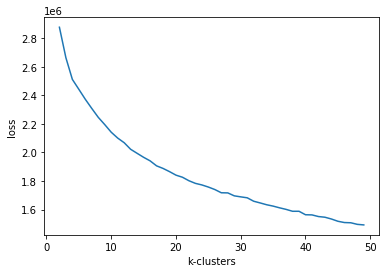

In [21]:
import sklearn
model_list=k_means(data_vect,range(2,50))

In [ ]:
df['labels']=model_list[18].labels_
cluster_analysis(df_1,20)

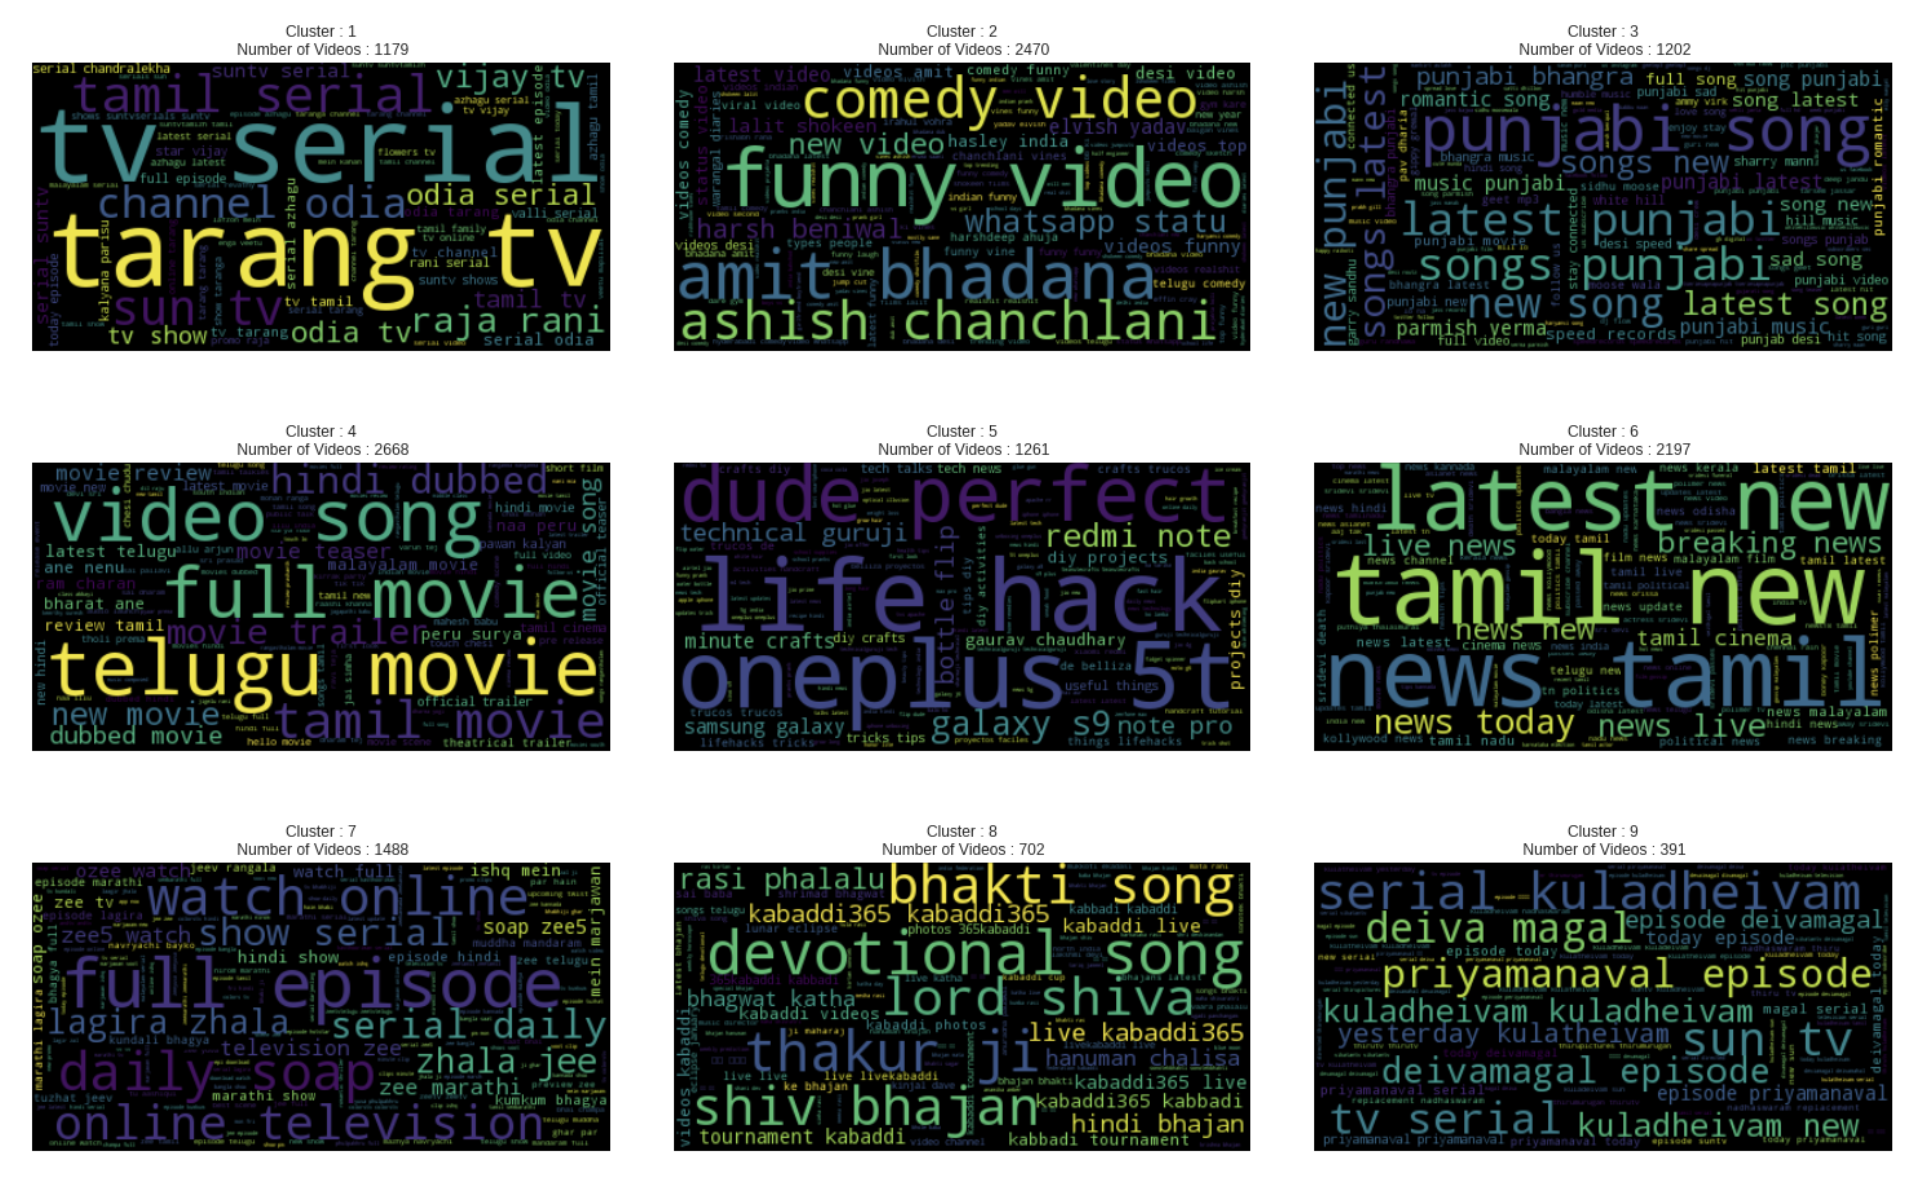

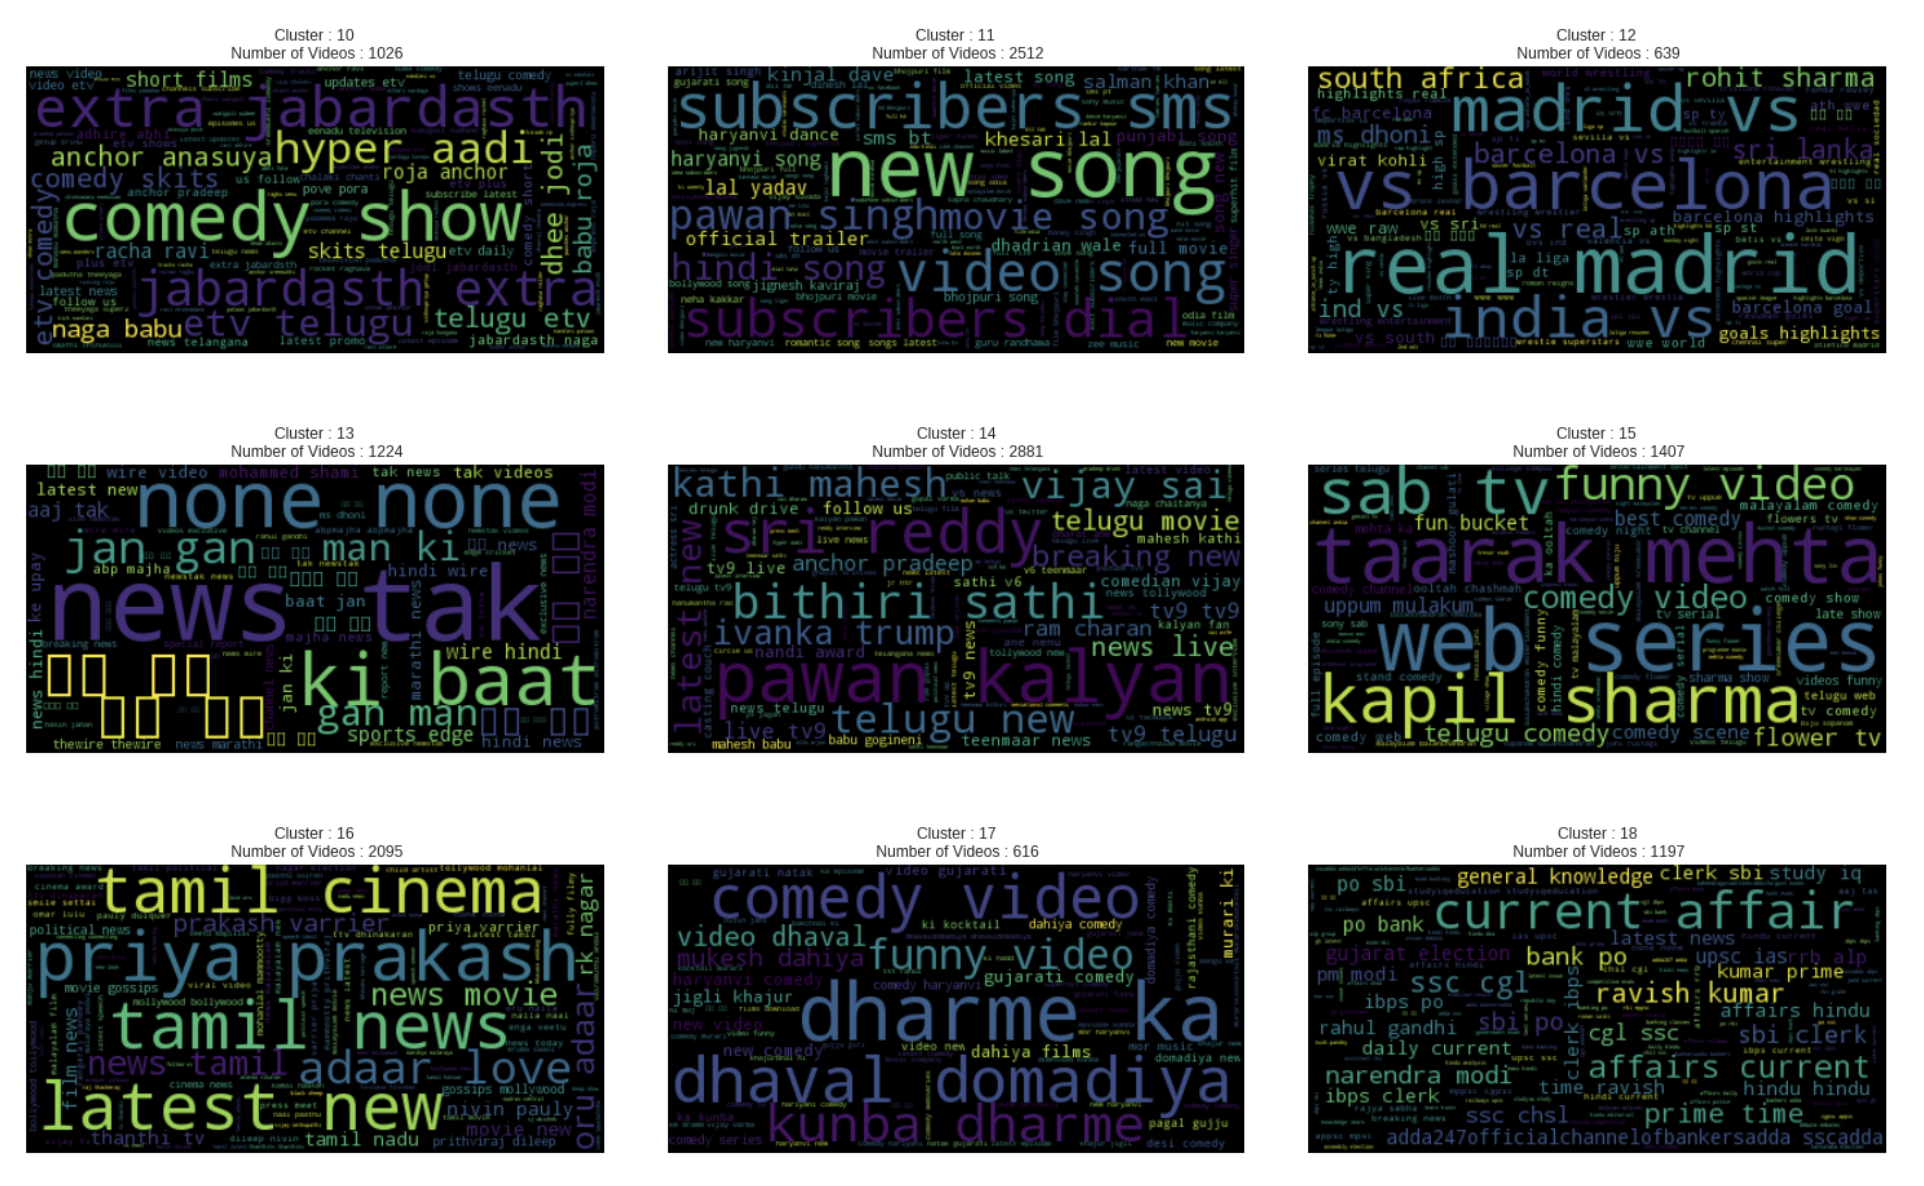

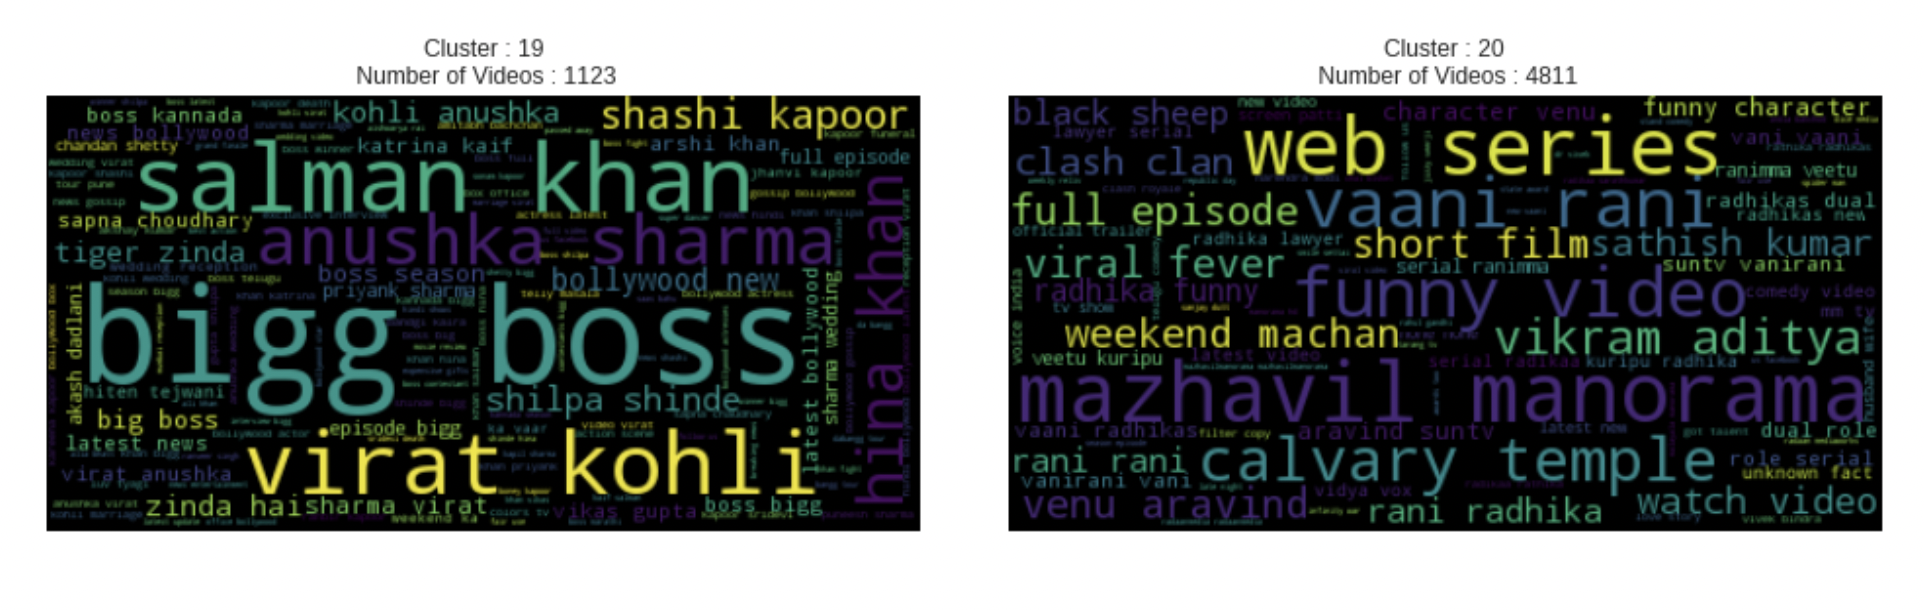